In [5]:
library(IRdisplay)
library(Cairo)

library(data.table)
library(arrow)
library(ggplot2)
library(cowplot)
library(ggrepel)
library(ggthemes)
library(ggpubr)
library(ggtext)
library(patchwork)
library(grid)
library(gridExtra)
library(scales)
library(stringr)
library(RColorBrewer)
library(yaml)
library(plyr)
library(tidyverse)
library(png)
library(rstatix)

In [6]:
# set global plot parameters
FONTSIZE = 12
THEME = theme_cowplot(font_size = FONTSIZE, font_family = 'Helvetica') + theme(plot.tag = element_text(face = "bold"))

In [7]:
output_path = '/data/nasif12/home_if12/tsi/projects/kipoi_veff_analysis/plots'
enrichment_df = open_dataset('pas_enrichment.parquet') %>% collect() %>% as.data.table()
veff_df = open_dataset('pas_bin_abexp.parquet') %>% collect() %>% as.data.table()

In [8]:
head(enrichment_df)

outlier_state,cse_distance_bin_label,bin_size,count,total_count,enrichment,ci_low,ci_high
<fct>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
overexpressed,"[-500, -250)",250,271,3334,0.0003251350,2.880312e-04,0.0003622387
underexpressed,"[-750, -500)",250,381,5030,0.0003029821,2.737340e-04,0.0003322303
normal,"[1000, 1250)",250,791529,15785796,0.0002005674,2.001368e-04,0.0002009980
underexpressed,"[-500, -250)",250,353,5030,0.0002807157,2.524781e-04,0.0003089533
underexpressed,"[1250, 1500)",250,129,5030,0.0001025845,8.511045e-05,0.0001200585
underexpressed,"[-1250, -1000)",250,556,5030,0.0004421471,4.074861e-04,0.0004768081


In [9]:
head(veff_df)

gene,tissue,individual,cse_distance,outlier_state,zscore,FDR,AbExp,expected_expr@theta,splice_ensemble@AbSplice,⋯,vep@NMD_transcript_variant.proportion,vep@NMD_escaping_variant.proportion,vep@start_lost.proportion,vep@splice_donor_variant.proportion,vep@splice_acceptor_variant.proportion,vep@splice_region_variant.proportion,cse_distance_bin,is_underexpressed,cse_distance_bin_label,bin_size
<chr>,<chr>,<chr>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>,<fct>,<int>
ENSG00000156482,Heart - Left Ventricle,GTEX-1GF9U,-1693,normal,0.2812967,1,0.0036780877,636.46674,NA,⋯,0.00000000,0,0,0,0,0,-1700,FALSE,"[-1750, -1500)",250
ENSG00000072756,Esophagus - Muscularis,GTEX-ZLFU,-1501,normal,0.6563184,1,0.0034337899,479.29074,NA,⋯,0.08661418,0,0,0,0,0,-1550,FALSE,"[-1750, -1500)",250
ENSG00000103544,Artery - Aorta,GTEX-T5JC,-1116,normal,0.8334819,1,0.0039910044,547.12335,5.743224e-06,⋯,0.00000000,0,0,0,0,0,-1150,FALSE,"[-1250, -1000)",250
ENSG00000118217,Whole Blood,GTEX-13FXS,401,normal,0.1686644,1,0.0001514048,142.82736,5.899276e-06,⋯,0.00000000,0,0,0,0,0,400,FALSE,"[250, 500)",250
ENSG00000112339,Lung,GTEX-15SB6,289,normal,2.4509177,1,0.0042134951,463.49243,NA,⋯,0.00000000,0,0,0,0,0,250,FALSE,"[250, 500)",250
ENSG00000018625,Brain - Substantia nigra,GTEX-T6MN,1388,normal,0.3244957,1,0.0023619255,47.17205,5.457243e-06,⋯,0.00000000,0,0,0,0,0,1350,FALSE,"[1250, 1500)",250


In [10]:
colnames(veff_df)

[1] "gene"                                      
 [2] "tissue"                                    
 [3] "individual"                                
 [4] "cse_distance"                              
 [5] "outlier_state"                             
 [6] "zscore"                                    
 [7] "FDR"                                       
 [8] "AbExp"                                     
 [9] "expected_expr@theta"                       
[10] "splice_ensemble@AbSplice"                  
[11] "splice_ensemble@MMSplice_SpliceMap_Psi_ref"
[12] "splice_ensemble@SpliceAI"                  
[13] "vep@cadd_raw.max"                          
[14] "vep@LoF_HC.proportion"                     
[15] "vep@transcript_ablation.proportion"        
[16] "vep@stop_gained.proportion"                
[17] "vep@frameshift_variant.proportion"         
[18] "vep@coding_sequence_variant.proportion"    
[19] "vep@missense_variant.proportion"           
[20] "vep@inframe_deletion.proportion"           
[21] "vep@inframe_insertion.proportion"          
[22] "vep@stop_lost.proportion"                  
[23] "vep@3_prime_UTR_variant.proportion"        
[24] "vep@5_prime_UTR_variant.proportion"        
[25] "vep@NMD_transcript_variant.proportion"     
[26] "vep@NMD_escaping_variant.proportion"       
[27] "vep@start_lost.proportion"                 
[28] "vep@splice_donor_variant.proportion"       
[29] "vep@splice_acceptor_variant.proportion"    
[30] "vep@splice_region_variant.proportion"      
[31] "cse_distance_bin"                          
[32] "is_underexpressed"                         
[33] "cse_distance_bin_label"                    
[34] "bin_size"

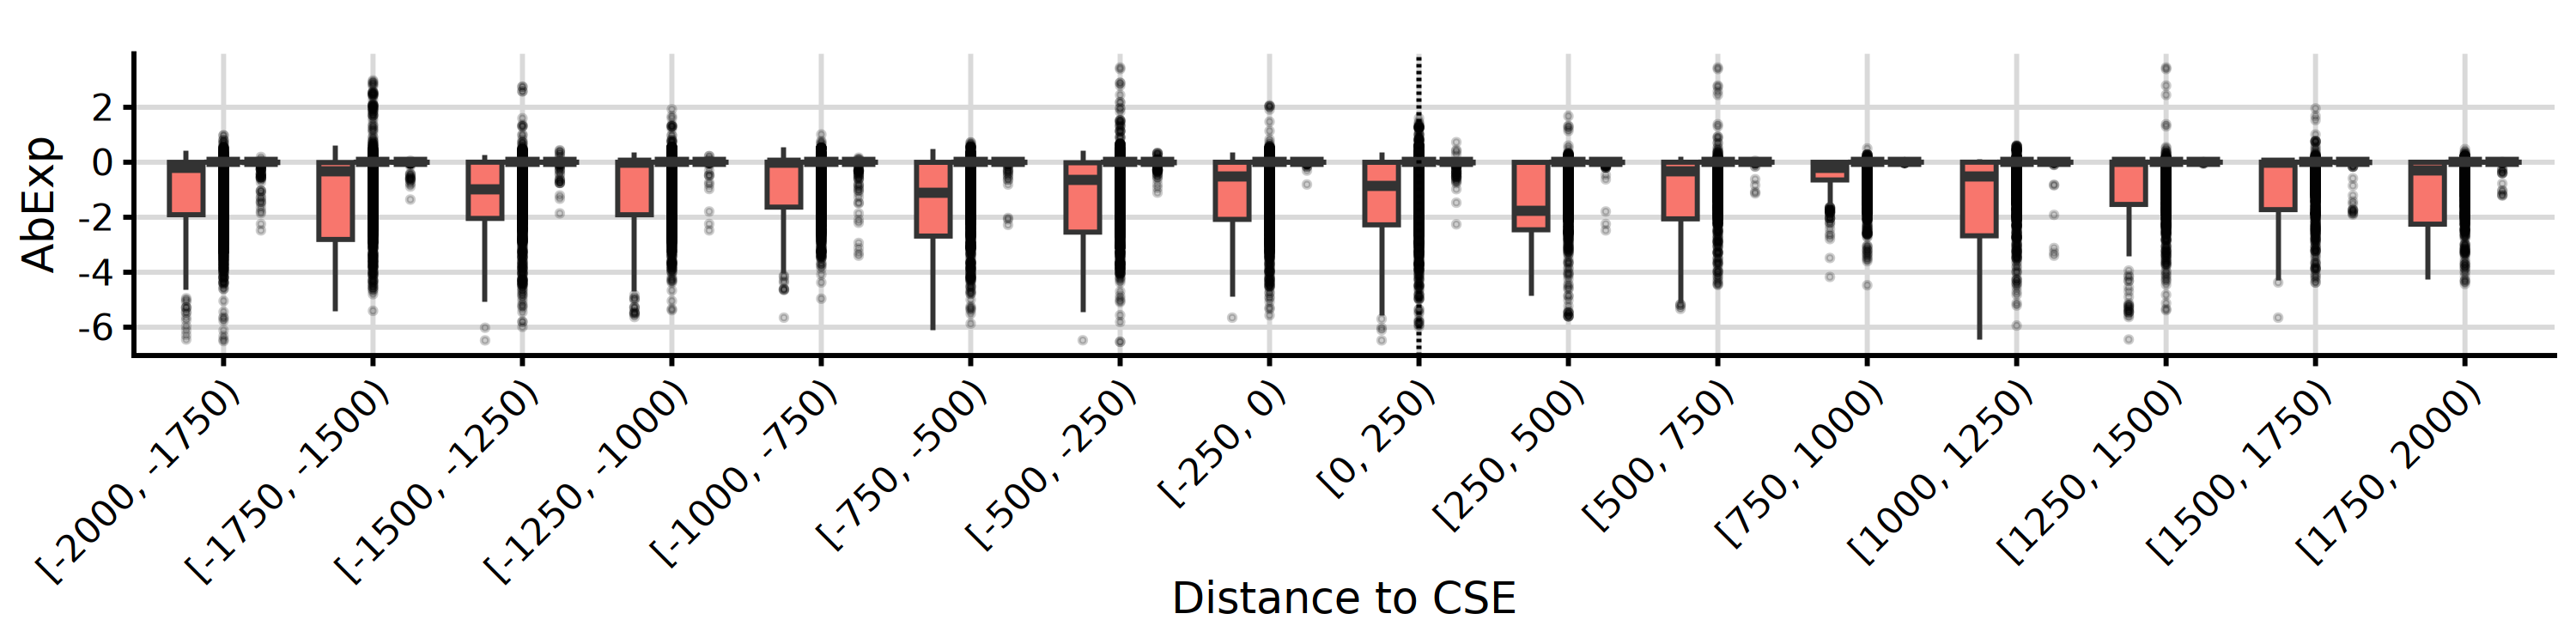

In [25]:
options(repr.plot.width=10, repr.plot.height=2.5, repr.plot.res=300)
p1 = (
    ggplot(veff_df %>% replace_na(list(`AbExp`=0)), aes(x=`cse_distance_bin_label`, fill=`outlier_state`))
    + geom_boxplot(aes(y=`AbExp`), outlier.size=0.5, outlier.color='#00000032', show.legend = FALSE)
    + THEME
    + theme(
        axis.text.x=element_text(angle = 45, hjust = 1),
        legend.position = c(0.7, 0.9),
        legend.margin=margin(-15,15,2,2),
        legend.background=element_rect(fill='white', color='black', linewidth=0.3)
    )
    + labs(
        x="Distance to CSE", 
        # y="AbExp score",
        color="",
        fill="",
        title=element_blank(),
    )
    # + coord_cartesian(ylim=c(-7.5, 2))
    + guides(size='none', fill = guide_legend(reverse = TRUE))
    + background_grid()
    + geom_vline(xintercept=9, linetype="dashed", color = "black")
    )
p1

In [12]:
log10_math_format <- function(x) {
  exponent <- floor(log10(x))
  base <- round(x / 10^exponent, 0)
  if (exponent < 4) {
      return(x)
  } else if (base == 1) {
    return(bquote(10^.(exponent)))  # 10^x format when base is 1
  }  else {
    return(bquote(.(base) %*% 10^.(exponent)))  # Base * 10^x format
  }
}

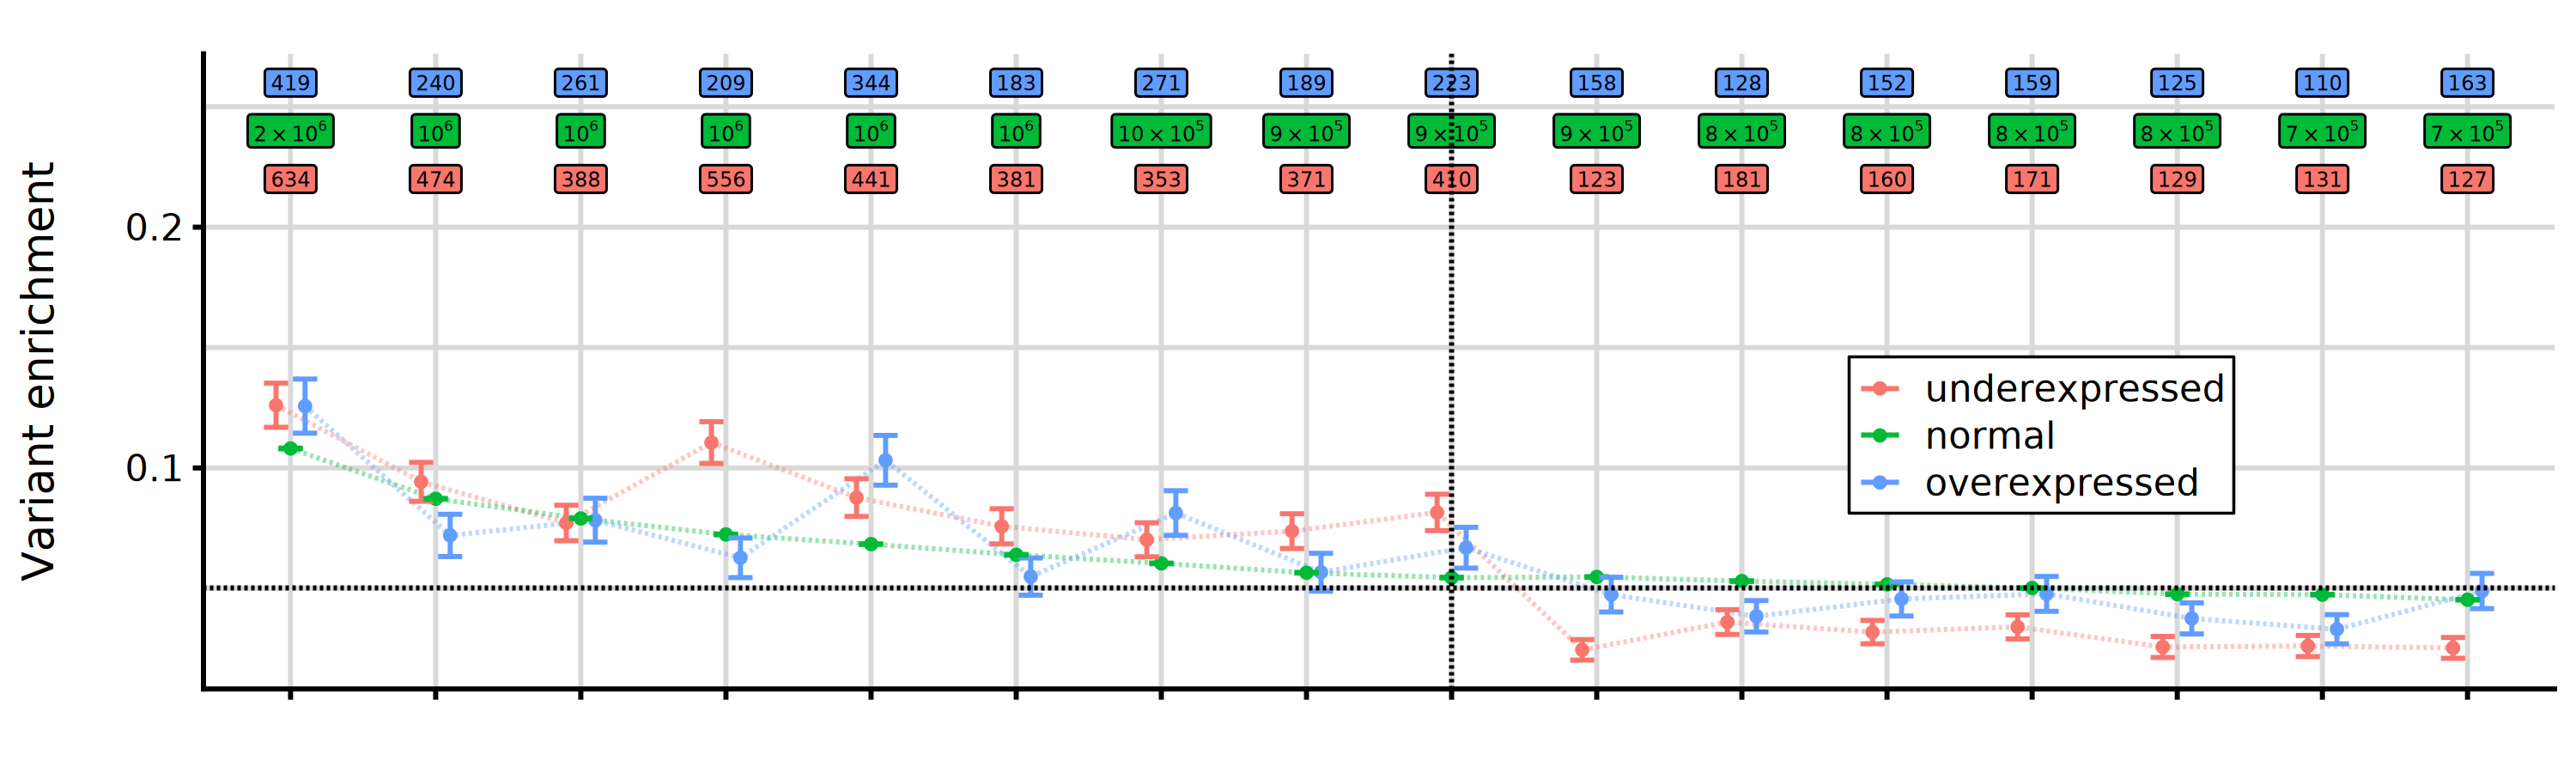

In [23]:
options(repr.plot.width=10, repr.plot.height=3, repr.plot.res=300)
dodge_width = 0.3
label_start_pos = 0.22
label_distance = 0.02
# Define the y-positions for each outlier state
outlier_state_y_positions <- c(
  "normal" = label_start_pos + label_distance,
  "underexpressed" = label_start_pos,
  "overexpressed" = label_start_pos + 2*label_distance
)

# Add the new y-position column based on outlier_state
enrichment_df <- enrichment_df %>%
  mutate(count_pos = outlier_state_y_positions[as.character(outlier_state)])

p2 = (
    ggplot(enrichment_df, aes(x=`cse_distance_bin_label`, y=`enrichment`*`bin_size`, fill=`outlier_state`, color=`outlier_state`))
    + geom_line(aes(group=`outlier_state`), linetype="dashed", position = position_dodge(width = dodge_width),  alpha=0.4)
    + geom_point(position = position_dodge(width = dodge_width), size=1)
    + geom_errorbar(aes(ymin=`ci_low`*`bin_size`, ymax=`ci_high`*`bin_size`), width=0.5, position = position_dodge(width = dodge_width))
    + THEME
    + theme(
        # axis.text.x=element_text(angle = 45, hjust = 1),
        axis.title.y = element_text(margin = margin(r = 20)),  # Increase margin on the right side of the y-axis label
        axis.text.x=element_blank(),
        legend.position = c(0.7, 0.4),
        legend.margin=margin(-15,15,2,2),
        legend.background=element_rect(fill='white', color='black', linewidth=0.3),
    )
    + labs(
        x="", 
        y="Variant enrichment",
        color="",
        fill="",
        title=element_blank(),
    )
    + background_grid(major = "xy", minor = "y", size.minor = 0.5)
    + geom_label(aes(label=sapply(`count`, log10_math_format), y=`count_pos`), size=2, color="black", parse=TRUE, show.legend=FALSE)  # Add count labels, adjust y to place below
    + geom_hline(yintercept=0.05, linetype="dashed", color = "black")
    + geom_vline(xintercept=9, linetype="dashed", color = "black"))
p2

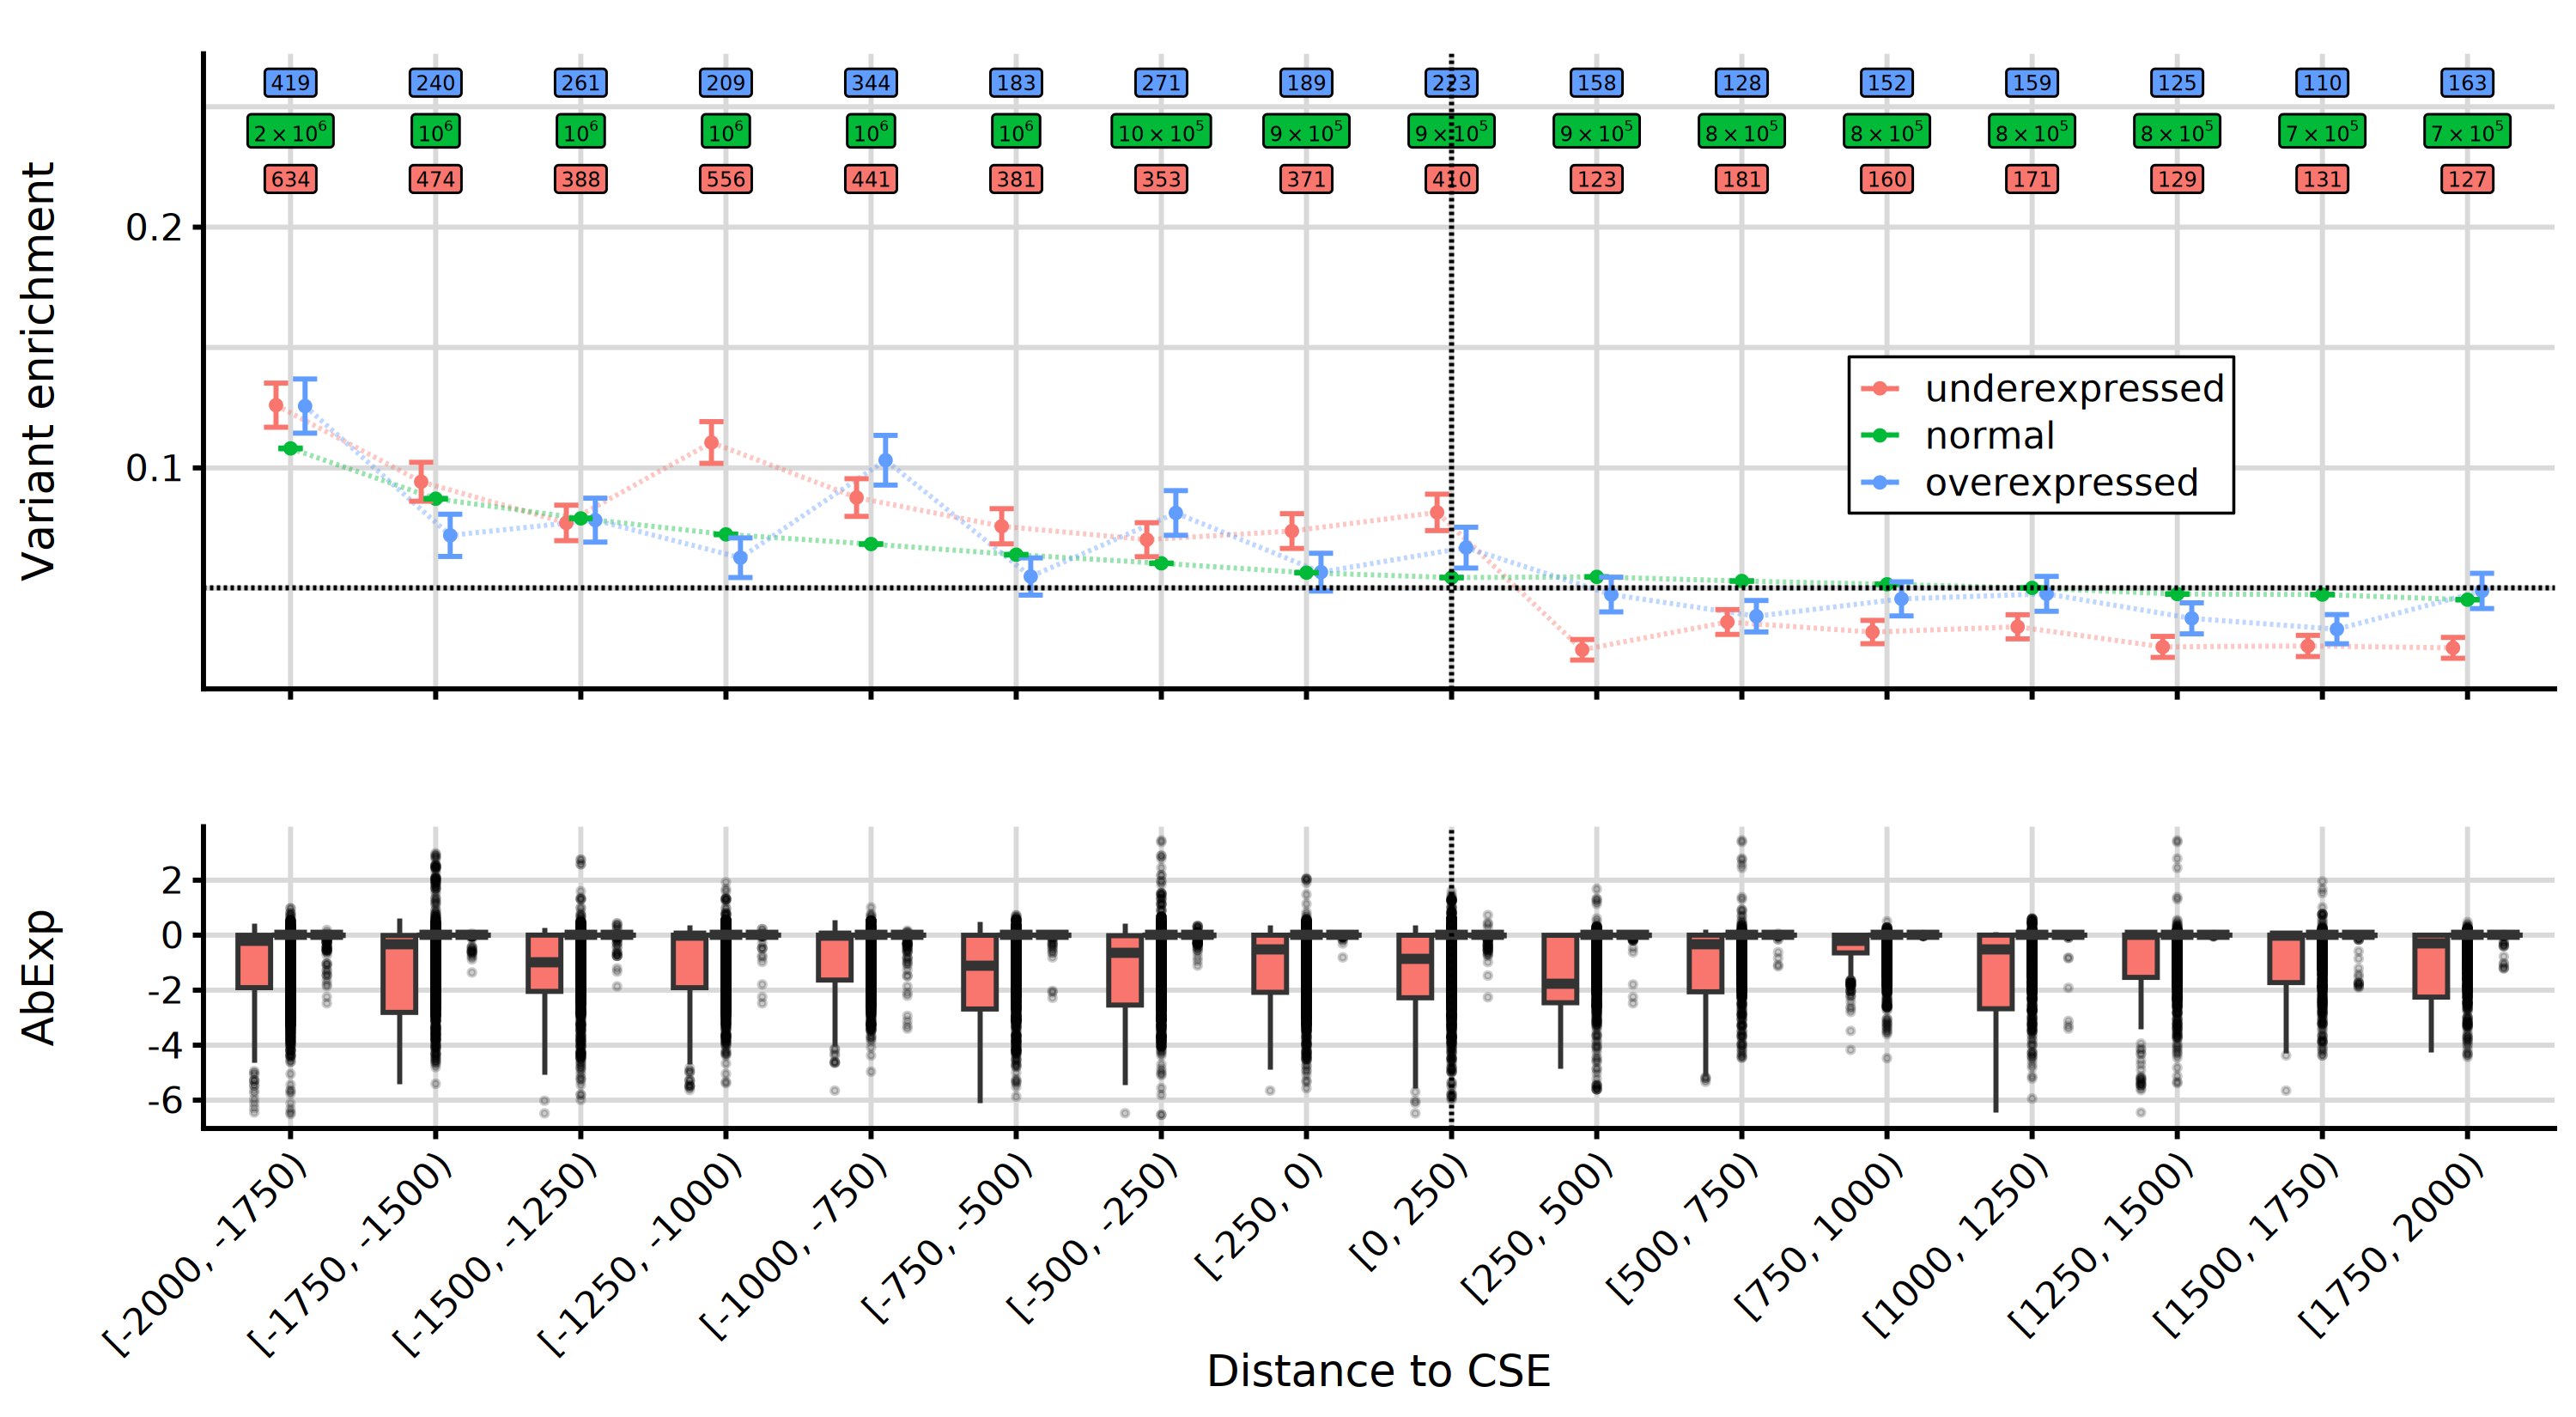

In [26]:
options(repr.plot.width=10, repr.plot.height=5.5, repr.plot.res=300)
p3 <- plot_grid(p2, p1, align='v',ncol=1, rel_heights = c(3, 2.5))
p3

In [27]:
width=10
height=5.5

path = paste(output_path, 'pas_enrichment', sep='/')
print(paste0("Saving to ", path, "..."))
ggsave(paste0(path, ".png"), p3, width = width, height = height, dpi=600, type='cairo')

[1] "Saving to /data/nasif12/home_if12/tsi/projects/kipoi_veff_analysis/plots/pas_enrichment..."


Warning message:
“Using ragg device as default. Ignoring `type` and `antialias` arguments”
